In [45]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import pandas.plotting
import math
from scipy.stats import skew
%matplotlib inline

In [6]:
data = pd.read_csv('ChurnPrediction/churn-prediction.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
CLIENTNUM                   10127 non-null int64
Attrition_Flag              10127 non-null object
Customer_Age                10127 non-null int64
Gender                      10127 non-null object
Dependent_count             10127 non-null int64
Education_Level             10127 non-null object
Marital_Status              10127 non-null object
Income_Category             10127 non-null object
Card_Category               10127 non-null object
Months_on_book              10127 non-null float64
Total_Relationship_Count    10127 non-null int64
Months_Inactive_12_mon      10127 non-null int64
Contacts_Count_12_mon       10127 non-null int64
Credit_Limit                10127 non-null float64
Total_Revolving_Bal         10127 non-null int64
Avg_Open_To_Buy             10127 non-null float64
Total_Amt_Chng_Q4_Q1        10127 non-null float64
Total_Trans_Amt             10127 non-null i

In [61]:
categorical = ['Attrition_Flag',
               'Gender',
               'Dependent_count',
               'Education_Level',
               'Marital_Status', 
               'Income_Category',
               'Card_Category',
              'Total_Relationship_Count',
              'Months_Inactive_12_mon',
              'Contacts_Count_12_mon']
numerical = [x for x in data.columns.to_list() if x not in categorical]

print(numerical)

['CLIENTNUM', 'Customer_Age', 'Months_on_book', 'Credit_Limit', 'Total_Revolving_Bal', 'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio', 'age_group']


In [62]:
data[categorical]

,Attrition_Flag,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon
0,Existing Customer,M,3,High School,Married,$60K - $80K,Blue,5,1,3
1,Existing Customer,F,5,Graduate,Single,Less than $40K,Blue,6,1,2
2,Existing Customer,M,3,Graduate,Married,$80K - $120K,Blue,4,1,0
3,Existing Customer,F,4,High School,Unknown,Less than $40K,Blue,3,4,1
4,Existing Customer,M,3,Uneducated,Married,$60K - $80K,Blue,5,1,0
...,...,...,...,...,...,...,...,...,...,...
10122,Existing Customer,M,2,Graduate,Single,$40K - $60K,Blue,3,2,3
10123,Attrited Customer,M,2,Unknown,Divorced,$40K - $60K,Blue,4,2,3
10124,Attrited Customer,F,1,High School,Married,Less than $40K,Blue,5,3,4
10125,Attrited Customer,M,2,Graduate,Unknown,$40K - $60K,Blue,4,3,3


In [9]:
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,3.900000e+01,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,4.400000e+01,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,3.600000e+01,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,3.400000e+01,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,2.100000e+01,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,4.000000e+01,...,2,3,4003.0,1851,2152.0,0.703,15476,117,0.857,0.462
10123,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,2.500000e+01,...,2,3,4277.0,2186,2091.0,0.804,8764,69,0.683,0.511
10124,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,3.600000e+01,...,3,4,5409.0,0,5409.0,0.819,10291,60,0.818,0.000
10125,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,2.147484e+09,...,3,3,5281.0,0,5281.0,0.535,8395,62,0.722,0.000


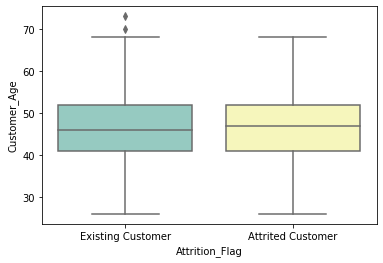

In [10]:
sns.boxplot(data=data, x="Attrition_Flag", y="Customer_Age", palette="Set3")
plt.show()

/Users/horiaiulian/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'Age for target variable Attrition_Flag')

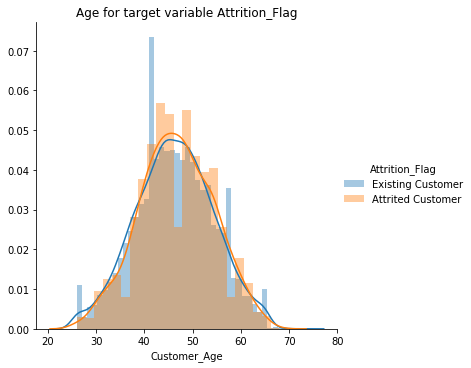

In [11]:
sns.FacetGrid(data, hue='Attrition_Flag', size=5) \
.map(sns.distplot, 'Customer_Age') \
.add_legend()
plt.title('Age for target variable Attrition_Flag')

In [12]:
for x in range(95, 101 , 1):
    print("{}% of people having age are less than equal to {}".format(x, data.Customer_Age.quantile(x/100)))
iqr = data.Customer_Age.quantile(0.75) - data.Customer_Age.quantile(0.25)
print('IQR {}'.format(iqr))

95% of people having age are less than equal to 60.0
96% of people having age are less than equal to 60.0
97% of people having age are less than equal to 62.0
98% of people having age are less than equal to 63.0
99% of people having age are less than equal to 65.0
100% of people having age are less than equal to 73.0
IQR 11.0


In [13]:
list_1 = [data]
for column in list_1:
    column.loc[column["Customer_Age"] < 30,  'age_group'] = 30
    column.loc[(column["Customer_Age"] >= 30) & (column["Customer_Age"] <= 44), 'age_group'] = 40
    column.loc[(column["Customer_Age"] >= 45) & (column["Customer_Age"] <= 59), 'age_group'] = 50
    column.loc[column["Customer_Age"] >= 60, 'age_group'] = 60

In [14]:
count_age_attition_flag = pd.crosstab(data['Attrition_Flag'],data['age_group']).apply(lambda x: x/x.sum() * 100)
count_age_attition_flag = count_age_attition_flag.transpose()

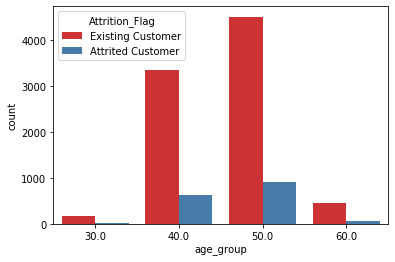

In [15]:
sns.countplot(x='age_group', data=data, hue='Attrition_Flag', palette="Set1")

In [16]:
data.isna().any()

CLIENTNUM                   False
Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
age_group                   False
dtype: bool

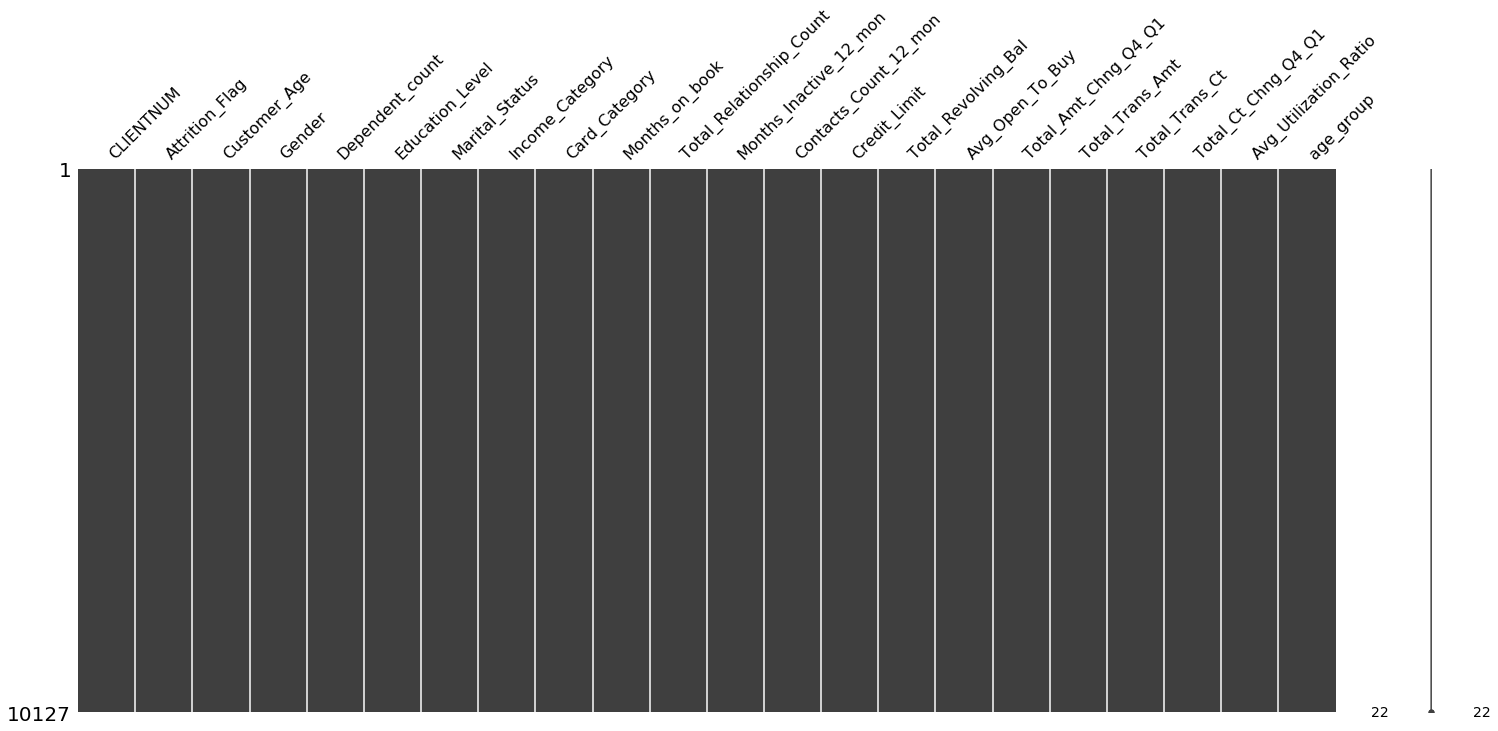

In [17]:
missingno.matrix(data)

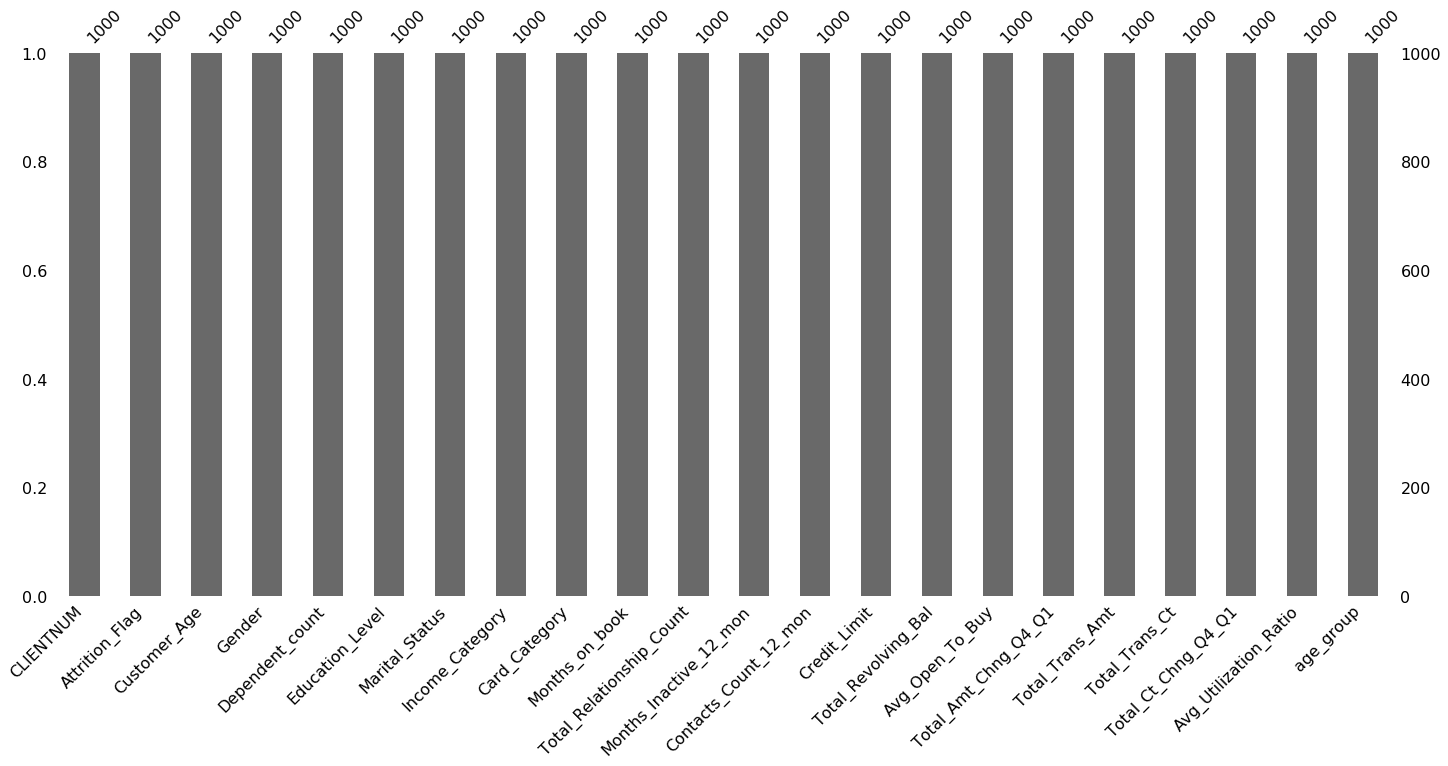

In [19]:
missingno.bar(data.sample(1000))

In [21]:
#Set and compute the Correlation Matrix:
sns.set(style="white")
corr = numerical_cal.corr()
#Generate a mask for the upper triangle:
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#Set up the matplotlib figure and a diverging colormap:
f, ax = plt.subplots(figsize=(18, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
#Draw the heatmap with the mask and correct aspect ratio:
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
square=True, linewidths=.5, cbar_kws={"shrink": .5})

NameError: name 'numerical_cal' is not defined

/Users/horiaiulian/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1, 'PDF of inactivity past 12  for target variable Attrition_Flag')

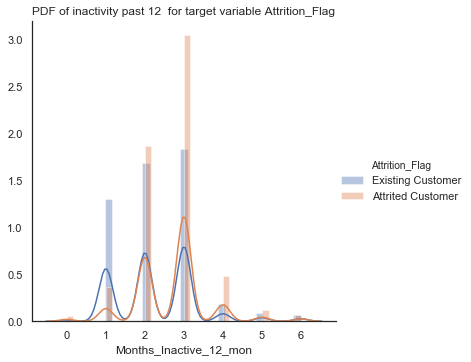

In [34]:
sns.FacetGrid(data, hue='Attrition_Flag', size=5) \
.map(sns.distplot, 'Months_Inactive_12_mon') \
.add_legend()
plt.title('PDF of inactivity past 12  for target variable Attrition_Flag')

In [22]:
data["Card_Category"].describe() # Categorical

count     10127
unique        4
top        Blue
freq       9436
Name: Card_Category, dtype: object

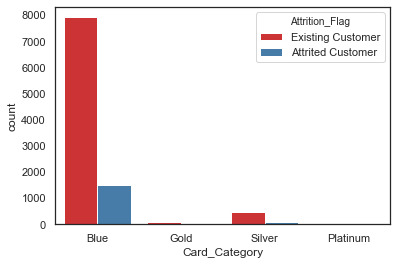

In [24]:
sns.countplot(x="Card_Category", data=data, hue='Attrition_Flag', palette="Set1")

In [28]:
#Card_Category will be encoded with OneHot_Encoder

In [31]:
data["Months_on_book"].describe()

count    1.012700e+04
mean     3.742297e+07
std      3.193385e+09
min     -2.147484e+09
25%      3.100000e+01
50%      3.600000e+01
75%      4.000000e+01
max      3.210000e+11
Name: Months_on_book, dtype: float64

In [37]:
data["Months_on_book"].unique()

array([ 3.90000000e+01,  4.40000000e+01,  3.60000000e+01,  3.40000000e+01,
        2.10000000e+01,  4.60000000e+01,  2.70000000e+01,  3.10000000e+01,
        5.40000000e+01,  3.00000000e+01,  4.80000000e+01,  3.70000000e+01,
        5.60000000e+01,  4.20000000e+01,  4.90000000e+01,  3.30000000e+01,
        2.80000000e+01,  3.80000000e+01,  4.10000000e+01,  4.30000000e+01,
        4.50000000e+01,  5.20000000e+01,  4.00000000e+01,  5.00000000e+01,
        3.50000000e+01,  4.70000000e+01,  3.20000000e+01,  2.00000000e+01,
        2.90000000e+01,  2.50000000e+01,  5.30000000e+01,  2.40000000e+01,
        5.50000000e+01,  2.30000000e+01,  2.20000000e+01,  2.60000000e+01,
        2.14748365e+09,  1.30000000e+01,  5.10000000e+01,  1.90000000e+01,
        1.50000000e+01,  1.70000000e+01,  1.80000000e+01, -2.14748365e+09,
        1.60000000e+01,  1.40000000e+01,  3.21000000e+11])

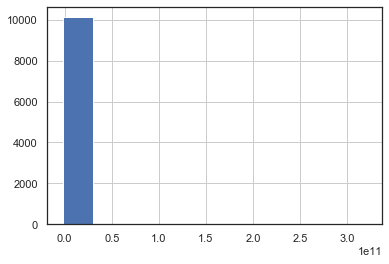

In [38]:
data["Months_on_book"].hist()

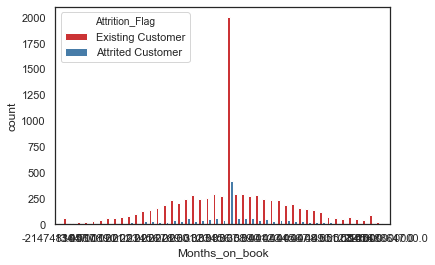

In [39]:
sns.countplot(x="Months_on_book", data=data, hue='Attrition_Flag', palette="Set1")

In [41]:
data["Total_Relationship_Count"].describe() # Categorical

count    10127.000000
mean         3.812580
std          1.554408
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          6.000000
Name: Total_Relationship_Count, dtype: float64

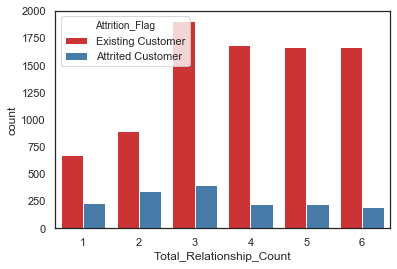

In [42]:
sns.countplot(x="Total_Relationship_Count", data=data, hue='Attrition_Flag', palette="Set1")

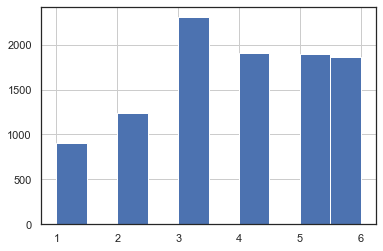

In [43]:
data["Total_Relationship_Count"].hist()

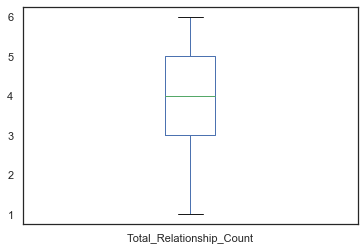

In [44]:
data["Total_Relationship_Count"].plot(kind="box")

In [46]:
skew(data["Total_Relationship_Count"])

-0.16242835172024658

In [47]:
data['Months_Inactive_12_mon'].describe()

count    10127.000000
mean         2.341167
std          1.010622
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Months_Inactive_12_mon, dtype: float64

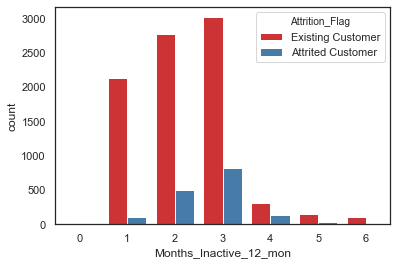

In [48]:
sns.countplot(x="Months_Inactive_12_mon", data=data, hue='Attrition_Flag', palette="Set1")

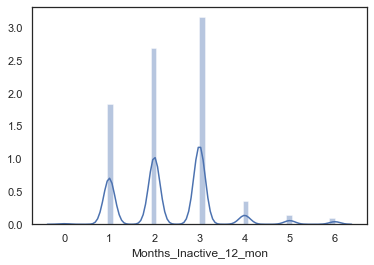

In [50]:
sns.distplot(data['Months_Inactive_12_mon'])

In [51]:
data['Contacts_Count_12_mon'].describe()

count    10127.000000
mean         2.455317
std          1.106225
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Contacts_Count_12_mon, dtype: float64

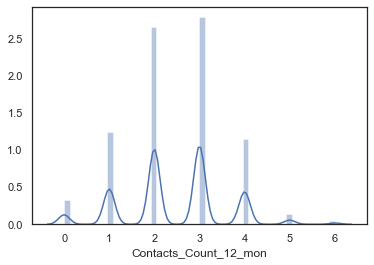

In [52]:
sns.distplot(data['Contacts_Count_12_mon'])

In [57]:
data['Contacts_Count_12_mon'].describe() #Categorical

count    10127.000000
mean         2.455317
std          1.106225
min          0.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          6.000000
Name: Contacts_Count_12_mon, dtype: float64

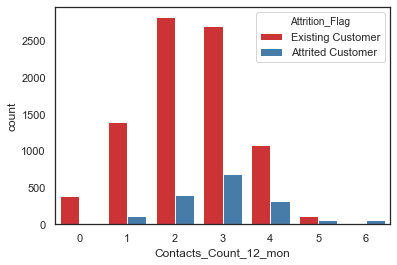

In [55]:
sns.countplot(x="Contacts_Count_12_mon", data=data, hue='Attrition_Flag', palette="Set1")

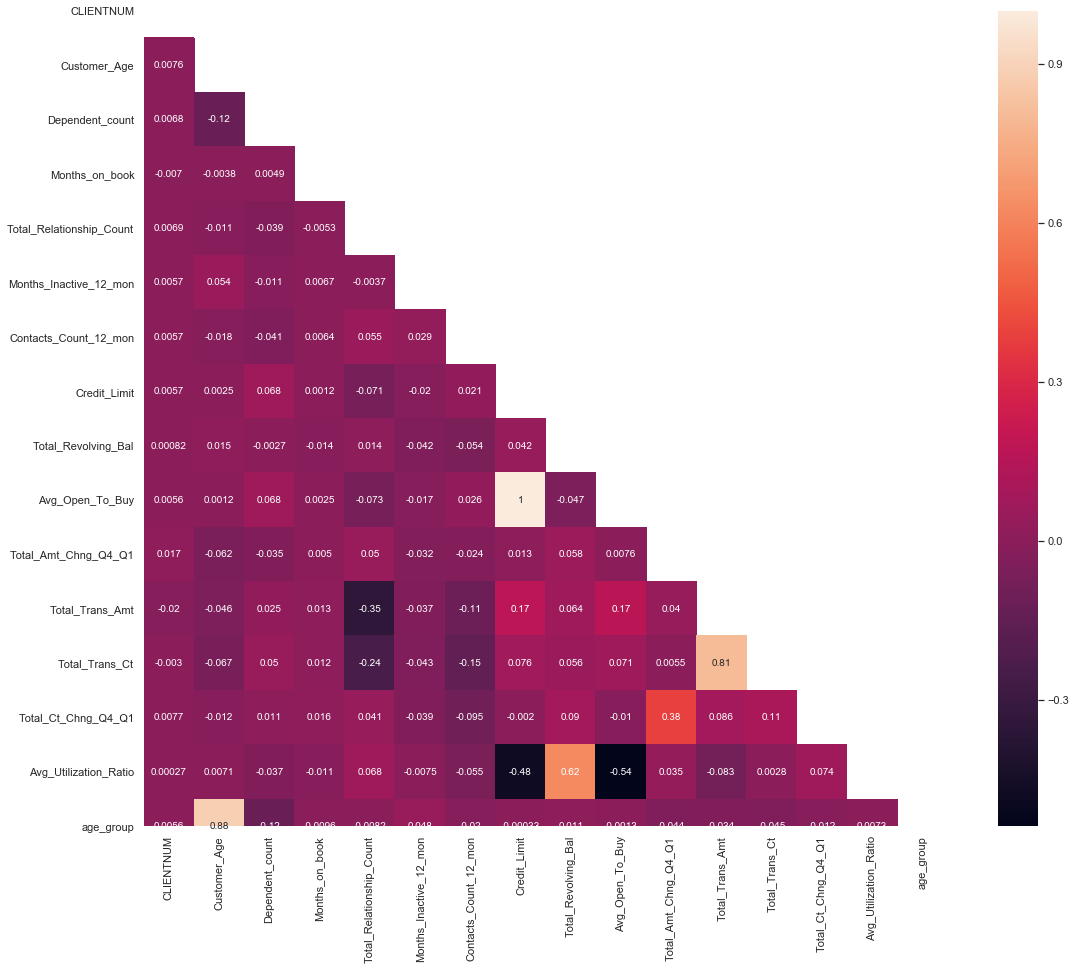

In [59]:
korelasyon=data.corr()
matrix = np.triu(data.corr())
figure, axis=plt.subplots(figsize=(18,15))
sns.heatmap(korelasyon, annot=True,mask=matrix,cmap="rocket")

In [60]:
categorical

['Attrition_Flag',
 'Gender',
 'Education_Level',
 'Marital_Status',
 'Income_Category',
 'Card_Category']